In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2022-07-06 14:15:42.831591: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

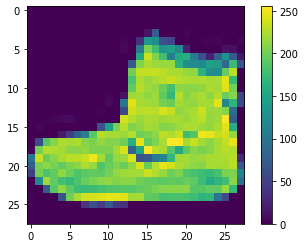

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images.shape

(60000, 28, 28)

In [11]:
class_names = ['T-Shirt','Trouser','Pullover','Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

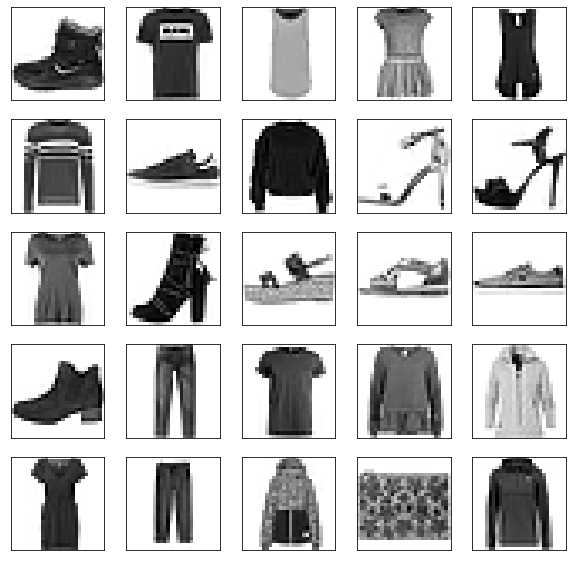

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]],c="w")
plt.show()

In [26]:
 model = keras.Sequential([
     # 1st layer: Transform th format of images from 2d array to a 1D array
     # 1st layer: UNpacking pixels
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(128, activation = tf.nn.relu),
     keras.layers.Dense(128, activation = tf.nn.relu),
     keras.layers.Dense(128, activation = tf.nn.relu),
     keras.layers.Dense(128, activation = tf.nn.relu),
     keras.layers.Dense(128, activation = tf.nn.relu),
     keras.layers.Dense(10, activation=tf.nn.softmax) # Returns an array of 10 probability scores
 ])
    
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8113 - accuracy: 0.7746
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4554 - accuracy: 0.8347
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4206 - accuracy: 0.8481
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3962 - accuracy: 0.8576
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3779 - accuracy: 0.8644
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3614 - accuracy: 0.8704
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3446 - accuracy: 0.8766
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3419 - accuracy: 0.8782
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3244 - accuracy: 0.8814
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.325

In [27]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 720us/step


In [28]:
predictions[0]

array([1.6406543e-13, 2.0384231e-20, 4.6552524e-15, 1.7247105e-11,
       5.3506956e-12, 4.3285396e-03, 2.7508317e-12, 1.3180538e-02,
       3.6675455e-18, 9.8249102e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

In [31]:
test_labels[0]

9